### Importing Necessary libraries

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

### Importing Data

In [3]:
books = pd.read_csv('book.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
#data already in good format, no need to make changes

## Apriori algorithm

### Association rules with 10% support and 80% confidence

In [5]:
frequent_items = apriori(books,min_support=0.1,use_colnames=True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [6]:
rule_1 = association_rules(frequent_items,min_threshold=0.8)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
2,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


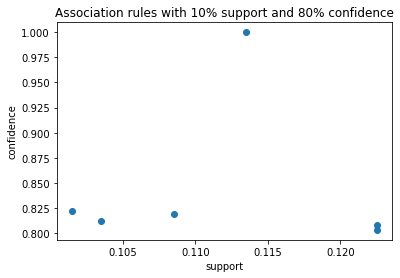

In [7]:
plt.scatter(rule_1.support, rule_1.confidence)
plt.title('Association rules with 10% support and 80% confidence')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Association rules with 15% support and 60% confidence

In [38]:
frequent_items_2 = apriori(books,min_support=0.15,use_colnames=True)
rule_2 = association_rules(frequent_items_2,min_threshold=0.60)
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


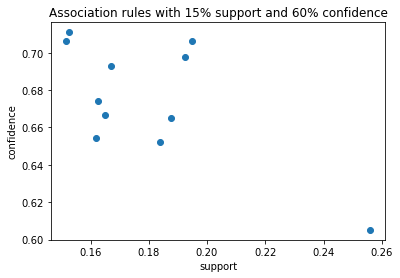

In [39]:
plt.scatter(rule_2.support,rule_2.confidence)
plt.title('Association rules with 15% support and 60% confidence')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### Association rules with 5% support and 85% confidence

In [31]:
frequent_items_3 = apriori(books,min_support=0.05,use_colnames=True)
rule_3 = association_rules(frequent_items_3,min_threshold=0.85)
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
2,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
3,"(DoItYBks, RefBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
4,"(GeogBks, RefBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152
5,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
6,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
7,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
8,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
9,"(DoItYBks, ChildBks, YouthBks)",(CookBks),0.0950,0.431,0.0820,0.863158,2.002687,0.041055,4.158077


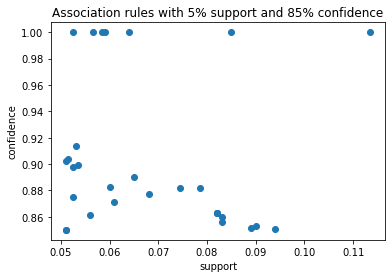

In [33]:
plt.scatter(rule_3.support,rule_3.confidence)
plt.title('Association rules with 5% support and 85% confidence')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()